test error: 
0.470083108064


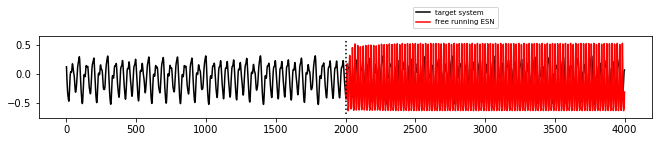

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy')
esn = ESN(n_inputs=1,
          n_outputs=1,
          n_reservoir=500,
          spectral_radius=1.5,
          random_state=42,
          print_state=False,
          activation_out = np.tanh,
          inverse_activation_out = np.arctanh)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen), data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')